## Customer Segmentation using Clustering¶

## Project Objective
- To segment customers into meaningful groups using unsupervised learning techniques, helping businesses understand customer behaviour and tailor marketing strategies.

### Dataset used¶
- Mall Customer Dataset

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Loading and inspeting the dataset

In [2]:
#loading the dataset 
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#dropping non-useful columns 
df = data.drop('CustomerID',axis= 1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
#checking for missing values 
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploratory Data analysis(EDA)

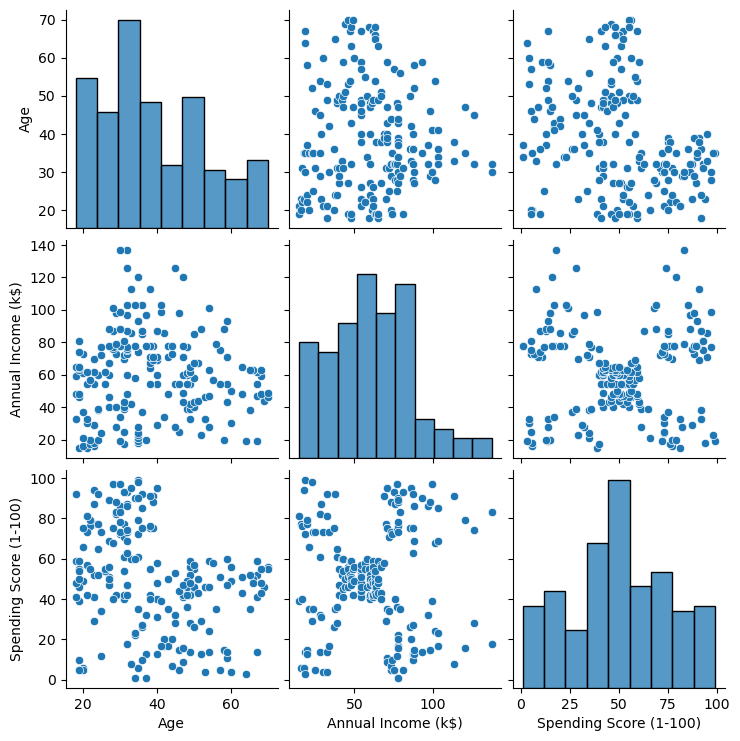

In [7]:
sns.pairplot(df)
plt.show()

### Dealing with categorical data

In [8]:
df_en = pd.get_dummies(df,columns=['Genre'],dtype = int)
df_en.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


### Feature Scaling

In [10]:
#scaling data using sklearn standard scaler 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_en)

### Choosing Number of Clusters

c:\Users\MP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

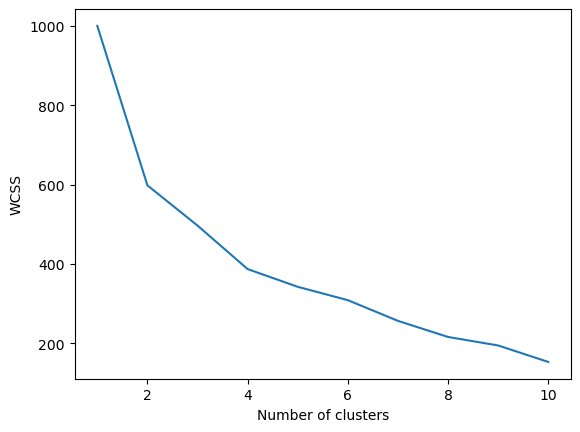

In [11]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Apply K-Means Clustering

In [12]:
#using kmeans with 4 n_clusters which we get from the elbow method  
kmeans = KMeans(n_clusters=4,random_state=42)
clusters = kmeans.fit_predict(df_scaled)

c:\Users\MP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
# Add a new column to our dataset from the kmeans 
df['Clusters'] = clusters
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,2


### Visualize Clusters (PCA)

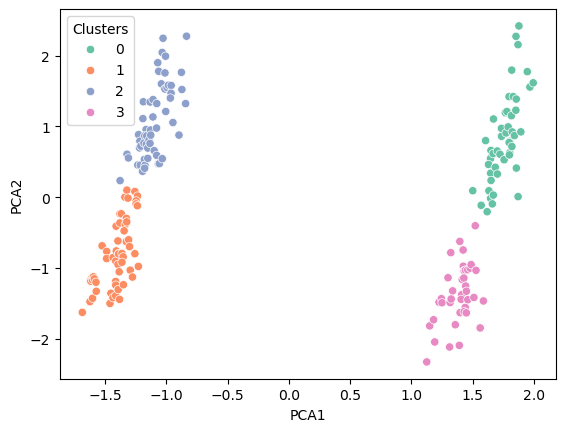

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)


df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Clusters', palette='Set2')
plt.show()